<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Dummy-Regressor" data-toc-modified-id="Dummy-Regressor-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dummy Regressor</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Decision-Tree-/-Random-Forest" data-toc-modified-id="Decision-Tree-/-Random-Forest-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Decision Tree / Random Forest</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

**ТЗ**

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

- Значение метрики RMSE на тестовой выборке должно быть не больше 48.

**Инструкция по выполнению проекта**

- Загрузите данные и выполните их ресемплирование по одному часу.
- Проанализируйте данные.
- Обучите разные модели с различными гиперпараметрами. Сделайте тестовую выборку размером 10% от исходных данных.
- Проверьте данные на тестовой выборке и сделайте выводы.


## Подготовка

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer


from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('/datasets/taxi.csv', encoding='UTF-8')
df.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


In [4]:
df['datetime'] = df['datetime'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


In [5]:
df = df.set_index('datetime')

In [6]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [7]:
df.isna().sum()

num_orders    0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_orders,26496.0,14.070463,9.21133,0.0,8.0,13.0,19.0,119.0


In [9]:
df.shape

(26496, 1)

In [10]:
df.idxmin()

num_orders   2018-03-01 05:20:00
dtype: datetime64[ns]

In [11]:
df.idxmax()

num_orders   2018-08-13 02:20:00
dtype: datetime64[ns]

In [12]:
df.index.is_monotonic

True

**Вывод**

- Время было приведено к типу datetime64 и перемешено в индексы
- Пропусков нет
- Данные представлены за полгода
- Временные промежутки равны

## Анализ

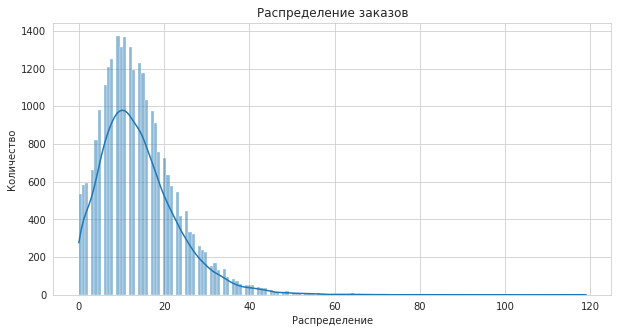

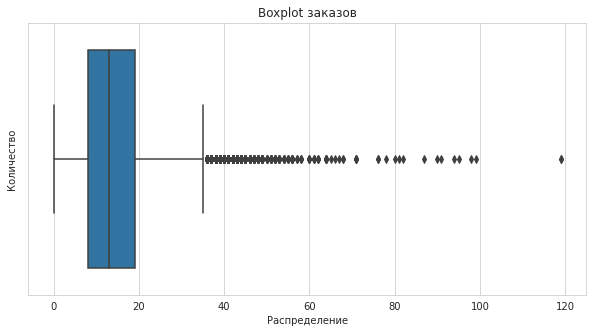

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df['num_orders'], kde=True)
plt.title('Распределение заказов')
plt.xlabel('Распределение')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(df['num_orders'])
plt.title('Boxplot заказов')
plt.xlabel('Распределение')
plt.ylabel('Количество')
plt.show()

**Вывод**

- Временной отрезок в данных равен 10 минутам
- В большей степени, в промежуток времени бывает 14-20 заказов

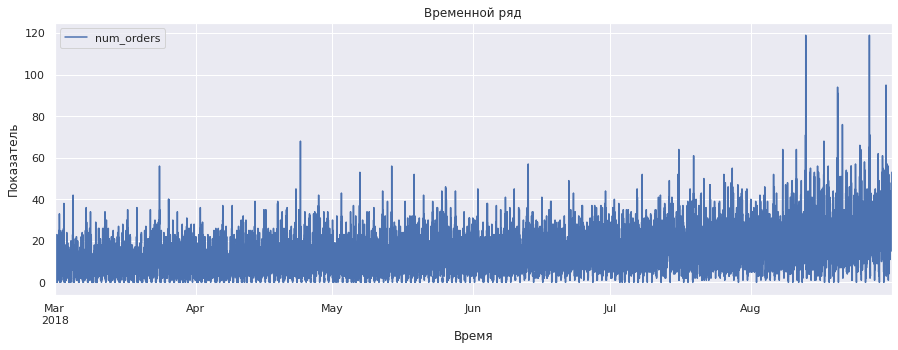

In [14]:
sns.set(rc={'figure.figsize':(15,5)})
df.plot()
plt.title('Временной ряд')
plt.xlabel('Время')
plt.ylabel('Показатель')
plt.show()

График нечитаем, поэтому сделаем ресемплирование с шагом в 1 день, основной датасет до часа

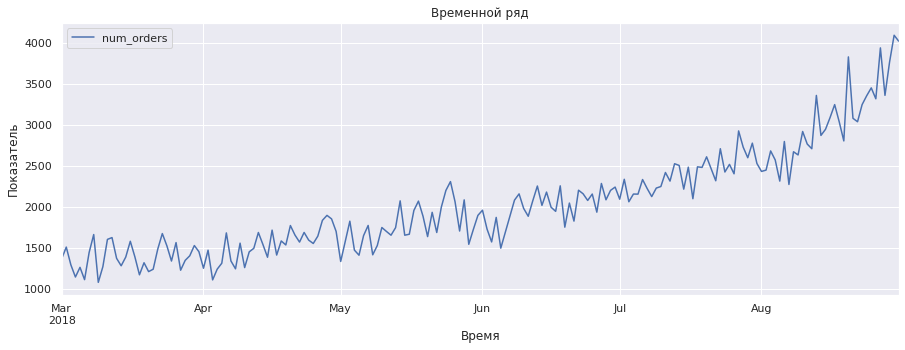

In [15]:
df = df.resample('1H').sum()
data = df.resample('1D').sum()

sns.set(rc={'figure.figsize':(15,5)})
data.plot()
plt.title('Временной ряд')
plt.xlabel('Время')
plt.ylabel('Показатель')
plt.show()

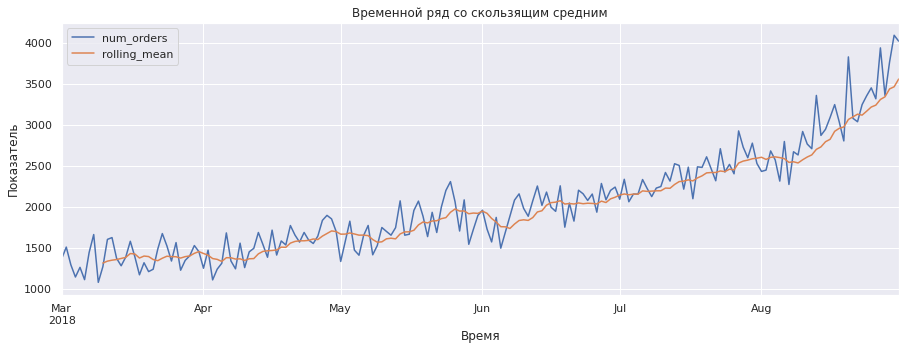

In [16]:
data['rolling_mean'] = data.rolling(10).mean()

sns.set(rc={'figure.figsize':(15,5)})
data.plot()
plt.title('Временной ряд со скользящим средним')
plt.xlabel('Время')
plt.ylabel('Показатель')
plt.show()

In [17]:
decomposed_df = seasonal_decompose(df)

Проверим тренд и сезонность

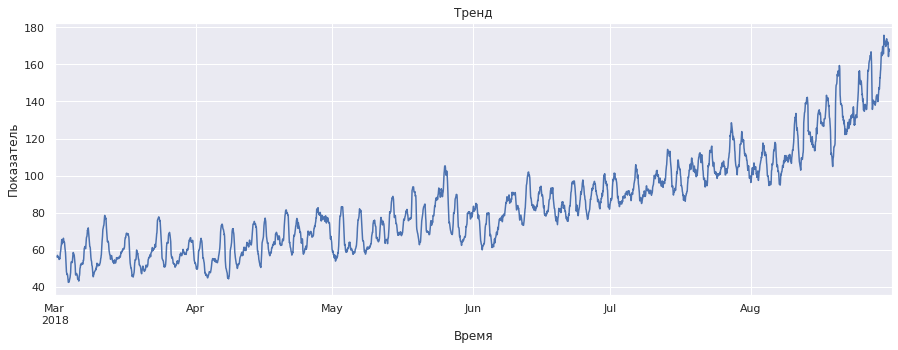

In [18]:
sns.set(rc={'figure.figsize':(15,5)})
decomposed_df.trend.plot()
plt.title('Тренд')
plt.xlabel('Время')
plt.ylabel('Показатель')
plt.show()

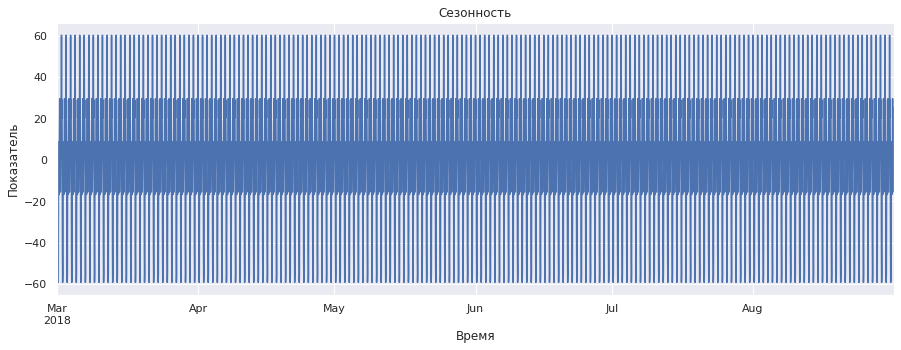

In [19]:
sns.set(rc={'figure.figsize':(15,5)})
decomposed_df.seasonal.plot()
plt.title('Сезонность')
plt.xlabel('Время')
plt.ylabel('Показатель')
plt.show()

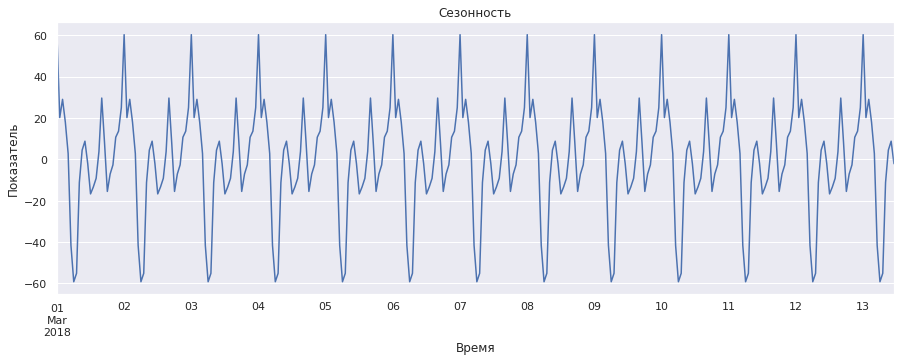

In [20]:
# Обрежем часть графика, чтобы он был читаемым
sns.set(rc={'figure.figsize':(15,5)})
decomposed_df.seasonal.head(300).plot()
plt.title('Сезонность')
plt.xlabel('Время')
plt.ylabel('Показатель')
plt.show()

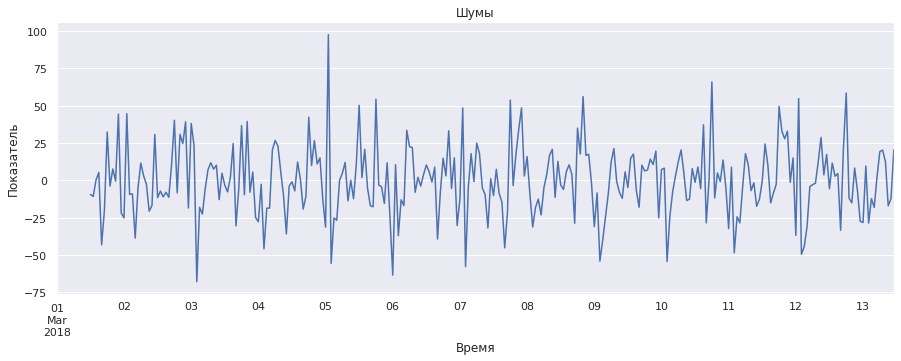

In [21]:
sns.set(rc={'figure.figsize':(15,5)})
decomposed_df.resid.head(300).plot()
plt.title('Шумы')
plt.xlabel('Время')
plt.ylabel('Показатель')
plt.show()

**Вывод**

- Имеется тренд на рост числа заказов в течение полугода
- Сезонность представляет собой суточный интервал с падением числа заказов ночью, ростом с утра, в обед и пиком роста к вечеру

## Обучение

In [22]:
def make_features(df, lag_size):
    df['month'] = df.index.month
    df['dayofweek'] = df.index.dayofweek
    df['day'] = df.index.day
    df['hour'] = df.index.hour
    
    for i in range (1, lag_size + 1):
        df[f'lag_{i}'] = df['num_orders'].shift(i)
        
    df['rolling_mean'] = df['num_orders'].shift().rolling(1).mean()
    df.dropna(inplace=True)
    
    return df

In [23]:
df_final = make_features(df, 4)
df_final.head()

,num_orders,month,dayofweek,day,hour,lag_1,lag_2,lag_3,lag_4,rolling_mean
datetime,,,,,,,,,,
2018-03-01 04:00:00,43,3,3,1,4,66.0,71.0,85.0,124.0,66.0
2018-03-01 05:00:00,6,3,3,1,5,43.0,66.0,71.0,85.0,43.0
2018-03-01 06:00:00,12,3,3,1,6,6.0,43.0,66.0,71.0,6.0
2018-03-01 07:00:00,15,3,3,1,7,12.0,6.0,43.0,66.0,12.0
2018-03-01 08:00:00,34,3,3,1,8,15.0,12.0,6.0,43.0,15.0


In [24]:
df_final.shape

(4412, 10)

In [25]:
features = df_final.drop('num_orders', axis=1)
target = df_final['num_orders']

print(f'features: {features.shape}\n'
      f'traget: {target.shape}')

features: (4412, 9)
traget: (4412,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    random_state=42, 
                                                    test_size=0.1,
                                                    shuffle=False)

print(f'X_train: {X_train.shape}\n'
      f'X_test: {X_test.shape}\n'
      f'y_train: {y_train.shape}\n'
      f'y_test: {y_test.shape}')

X_train: (3970, 9)
X_test: (442, 9)
y_train: (3970,)
y_test: (442,)


In [27]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
mse = make_scorer(mean_squared_error)

In [29]:
tscv = TimeSeriesSplit(n_splits=5)

### Dummy Regressor

In [30]:
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train_scaled, y_train)
dummy_cv = cross_val_score(dummy_model, 
                           X_train_scaled, 
                           y_train, 
                           cv=tscv,
                           scoring=mse)
dummy_mse = np.mean(dummy_cv)
print(f'Dummy RMSE: {math.sqrt(dummy_mse)}')

Dummy RMSE: 41.38887799201684


### Linear Regression

In [31]:
reg_model = LinearRegression()
reg_model.fit(X_train_scaled, y_train)
reg_cv = cross_val_score(reg_model, 
                         X_train_scaled, 
                         y_train, 
                         cv=tscv,
                         scoring=mse)
reg_mse = np.mean(reg_cv)
print(f'DuREgression RMSE: {math.sqrt(reg_mse)}')

DuREgression RMSE: 31.746784321856516


### Decision Tree / Random Forest

Для поиска оптимальных моделей инициализируем класс OptimalModels

Принципы ООП оптимизируют процесс поиска лучших моделей:

- **Абстракция.** Класс абстрагирует концепцию оптимальных моделей от конкретной реализации. Он предоставляет абстрактный интерфейс для работы с моделями
- **Полиморфизм.** В коде используются методы decision_tree и random_forest, которые предоставляют одинаковый интерфейс для работы с разными моделями машинного обучения
- **Инкапсуляция.** Атрибуты X_train и y_train и методы decision_tree и random_forest объединены в одном объекте. Данные и методы для работы с ними объединены внутри класса без доступа клиента (внешнего кода)

**!!! Поиск параметров леса модет быть долгим, потому что обучается 64 модели**

In [32]:
class OptimalModels:
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def decision_tree(self):
        res = pd.DataFrame(columns=['depth', 'mse', 'rmse'])
        for i in range(1, 10):
            model = DecisionTreeRegressor(max_depth=i, random_state=42)
            model.fit(self.X_train, self.y_train)
            cross_validation = cross_val_score(model,
                                               self.X_train,
                                               self.y_train,
                                               cv=tscv,
                                               scoring=mse)  
            score = np.mean(cross_validation)
            res = res.append({
                'depth': i,
                'mse': score,
                'rmse': math.sqrt(score)
            }, ignore_index=True)
        return res.sort_values(by='rmse', ascending=True).head(1)

    def random_forest(self):
        res = pd.DataFrame(columns=['depth', 'estimators', 'mse', 'rmse'])
        for i in range(2, 10):
            for j in range(2, 10):
                model = RandomForestRegressor(max_depth=i, n_estimators=j, random_state=42)
                model.fit(self.X_train, self.y_train)
                cross_validation = cross_val_score(model,
                                                   self.X_train,
                                                   self.y_train,
                                                   cv=tscv,
                                                   scoring=mse)  
                score = np.mean(cross_validation)
                res = res.append({
                    'depth': i,
                    'estimators': j,
                    'mse': score,
                    'rmse': math.sqrt(score)
                }, ignore_index=True)
        return res.sort_values(by='rmse', ascending=True).head(1)

In [33]:
optimal_model = OptimalModels(X_train, y_train)

#### Decision Tree

In [34]:
%%time
tree_mse_res = optimal_model.decision_tree()
tree_mse = tree_mse_res['mse']
tree_mse_res

CPU times: user 493 ms, sys: 489 µs, total: 494 ms
Wall time: 492 ms


,depth,mse,rmse
6,7.0,863.092242,29.378432


#### Random Forest

In [35]:
%%time
forest_mse_res = optimal_model.random_forest()
forest_mse = forest_mse_res['mse']
forest_mse_res

CPU times: user 10.8 s, sys: 44.6 ms, total: 10.9 s
Wall time: 10.9 s


,depth,estimators,mse,rmse
63,9.0,9.0,729.609885,27.011292


**Вывод**

Все 3 модели показали хороший результат, однако случайный лес показал наилучшую метрику. Тем не менее, большие модели более склонны к переобучению, поэтому проверим на тестовой выборке все модели

## Тестирование

In [36]:
def graph(y_test, y_pred, index=y_test.index):
    dataframe = pd.DataFrame({
        'y_pred': y_pred,
        'y_test': y_test
    }, index=index)
    return dataframe.plot()

In [37]:
model_reg_test = LinearRegression()
model_reg_test.fit(X_train_scaled, y_train)
y_pred_reg = model_reg_test.predict(X_test_scaled)
mse_reg_test = mean_squared_error(y_test, y_pred_reg)

print(f'Reg RMSE: {math.sqrt(reg_mse)}\n'
      f'Reg test RMSE: {math.sqrt(mse_reg_test)}')

Reg RMSE: 31.746784321856516
Reg test RMSE: 52.574506853736935


<AxesSubplot:xlabel='datetime'>

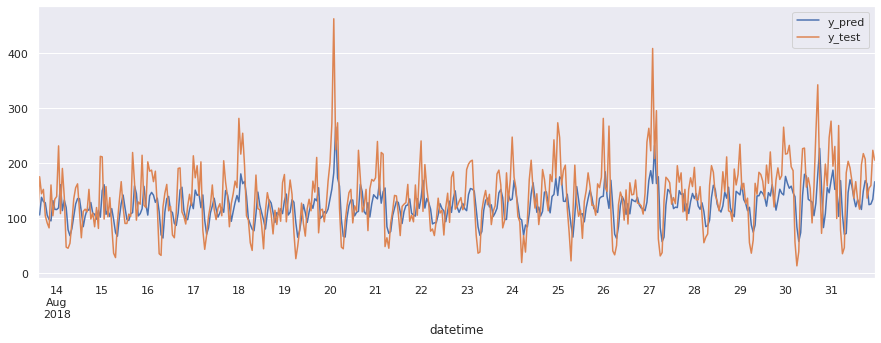

In [38]:
graph(y_test, y_pred_reg)

In [39]:
model_tree_test = DecisionTreeRegressor(max_depth=7,
                                        random_state=42)
model_tree_test.fit(X_train, y_train)
y_pred_tree = model_tree_test.predict(X_test)
mse_tree_test = mean_squared_error(y_test, y_pred_tree)

print(f'Tree RMSE: {math.sqrt(tree_mse)}\n'
      f'Tree test RMSE: {math.sqrt(mse_tree_test)}')

Tree RMSE: 29.37843157247296
Tree test RMSE: 53.77665799766755


<AxesSubplot:xlabel='datetime'>

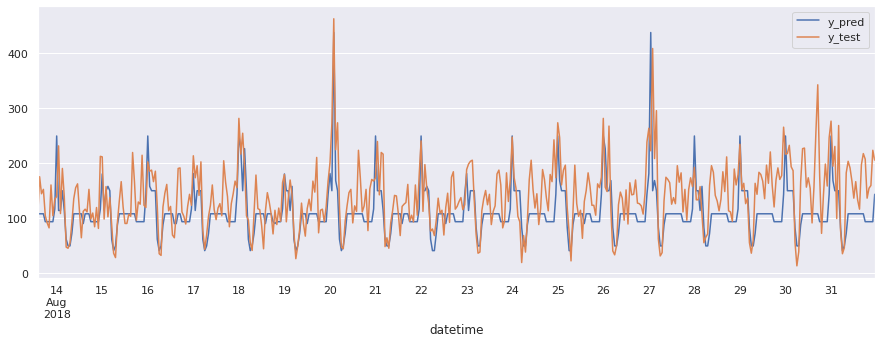

In [40]:
graph(y_test, y_pred_tree)

In [41]:
model_forest_test = RandomForestRegressor(max_depth=90,
                                          n_estimators=90,
                                          random_state=42,
                                          min_samples_split=2, 
                                          min_samples_leaf=1,)
model_forest_test.fit(X_train, y_train)
y_forest_pred = model_forest_test.predict(X_test)
mse_forest_test = mean_squared_error(y_test, y_forest_pred)

print(f'Forest RMSE: {math.sqrt(forest_mse)}\n'
      f'Forest test RMSE: {math.sqrt(mse_forest_test)}')

Forest RMSE: 27.01129181002643
Forest test RMSE: 46.93455945025308


**У модели были увеличены параметры для улучшения качества. Хоть модель и склонна к небольшому переобучению, оно контролируемо и находится в пределах искомой метрики (меньше 48)**

<AxesSubplot:xlabel='datetime'>

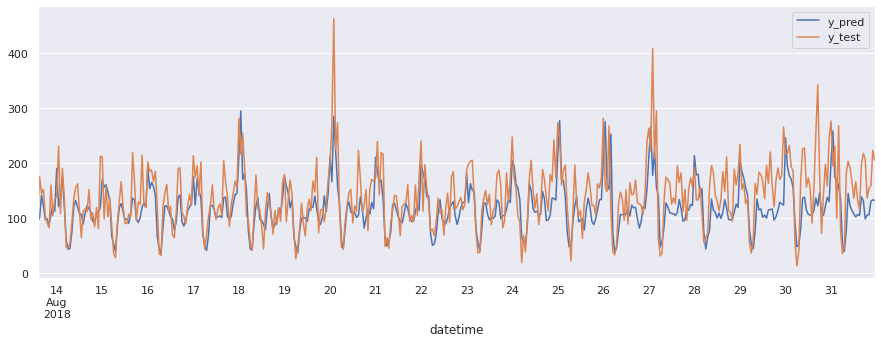

In [42]:
graph(y_test, y_forest_pred)

**Общий вывод**

- Были получены и проанализированы данные о заказах такси за 2 и 3 квартал 2018 года
- Временные данные имели интервал в 10 минут и были ресемплированы до часа
- Были определены сезонность и тренд


    - Имеется тренд на рост числа заказов в течение полугода
    - Сезонность представляет собой суточный интервал с падением числа заказов ночью, ростом с утра, в обед и пиком роста к вечеру
    
    
- В данные были добавлены признаки о месяце, дне, часе заказа
- Полученный датасет был разделён на выборки для обучения моделей в соотношении 9:1
- Перед обучением моделей была построена константная модель для определения максимума метрики, выше которого модели не будут иметь смысла
- Для обучения были взяты следующие модели:


    - Линейная регрессия
    - Дерево решений
    - Случайный лес
    
    
- Для моделей были подобраны оптимальные гиперпараметры
- Все модели дали приемлемый результат, поэтому все модели были также проверены на тестовой выборке на переобучаемость
- Самой оптимальной моделью оказался случайный лес. Ввиду своего размера лес склонен к переобучению, однако, переобучение в пределах допустимой выборки

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48